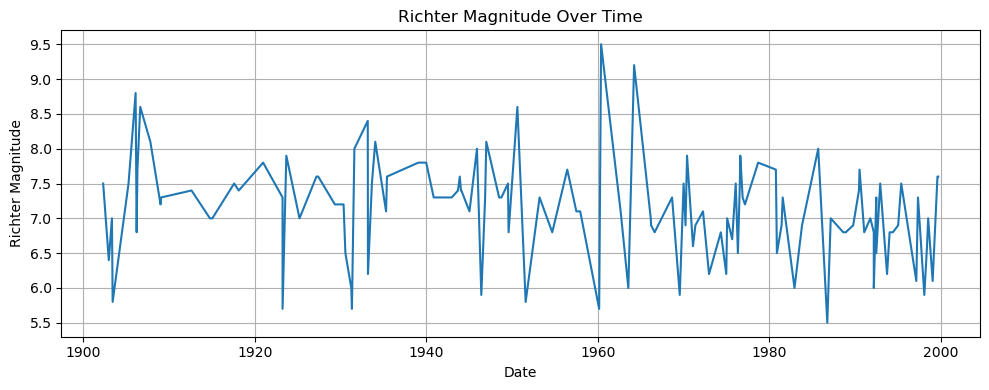

=== Augmented Dickey-Fuller Test ===
Test Statistic : -5.262070147019102
p-value        : 6.558308053006853e-06
Critical Values:
  1% : -3.486055829282407
  5% : -2.8859430324074076
  10% : -2.5797850694444446
=> Likely Stationary (Reject Null Hypothesis)


=== KPSS Test ===
Test Statistic : 0.808588603488589
p-value        : 0.01
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
=> Likely Non-Stationary (Reject Null Hypothesis)


C:\Users\jenit\AppData\Local\Temp\ipykernel_20964\3259114290.py:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(richter_series, regression='c', nlags='auto')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load the dataset
df = pd.read_csv('earthquakes.csv')

# Convert 'month' name to month number
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month

# Create a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Set the datetime column as index and sort
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Extract the 'richter' series
richter_series = df['richter'].dropna()

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(richter_series)
plt.title('Richter Magnitude Over Time')
plt.xlabel('Date')
plt.ylabel('Richter Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Augmented Dickey-Fuller Test ---
adf_result = adfuller(richter_series)
print("=== Augmented Dickey-Fuller Test ===")
print(f"Test Statistic : {adf_result[0]}")
print(f"p-value        : {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key} : {value}")
if adf_result[1] < 0.05:
    print("=> Likely Stationary (Reject Null Hypothesis)")
else:
    print("=> Likely Non-Stationary (Fail to Reject Null Hypothesis)")

print("\n")

# --- KPSS Test ---
kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(richter_series, regression='c', nlags='auto')
print("=== KPSS Test ===")
print(f"Test Statistic : {kpss_stat}")
print(f"p-value        : {kpss_p}")
print("Critical Values:")
for key, value in kpss_crit.items():
    print(f"  {key} : {value}")
if kpss_stat > kpss_crit['5%']:
    print("=> Likely Non-Stationary (Reject Null Hypothesis)")
else:
    print("=> Likely Stationary (Fail to Reject Null Hypothesis)")
